In [1]:
from metaflow import Flow

In [2]:
run = Flow('ClassifierTrainFlow').latest_run

In [3]:
run

Run('ClassifierTrainFlow/1715864864712404')

In [5]:
from datetime import datetime
dt = run.created_at
print(dt.strftime("%Y-%m-%d %H:%M:%S.%f"))

2024-05-15 20:50:41.389000


In [4]:
train_data = run['start'].task.data.train_data
test_data = run['start'].task.data.test_data

train_labels = run['start'].task.data.train_labels
test_labels = run['start'].task.data.test_labels


In [5]:
from metaflow import Flow, Run
for step in Run("ClassifierTrainFlow/1715799041386416"):     
    for task in step:         
        if not task.successful:         
            if 'svm' in task.stderr:    
                print("Task %s failed:" % task.pathspec)             
                print("-- Stdout --")             
                print(task.stdout)             
                print("-- Stderr --")             
                print(task.stderr) 

Task ClassifierTrainFlow/1715799041386416/train_svm/3 failed:
-- Stdout --

-- Stderr --
<flow ClassifierTrainFlow step train_svm> failed:
    Internal error
Traceback (most recent call last):
  File "/home/notjdr/miniconda3/envs/datasci/lib/python3.10/site-packages/metaflow/cli.py", line 1177, in main
    start(auto_envvar_prefix="METAFLOW", obj=state)
  File "/home/notjdr/miniconda3/envs/datasci/lib/python3.10/site-packages/metaflow/tracing/__init__.py", line 27, in wrapper_func
    return func(args, kwargs)
  File "/home/notjdr/miniconda3/envs/datasci/lib/python3.10/site-packages/metaflow/_vendor/click/core.py", line 829, in __call__
    return self.main(args, kwargs)
  File "/home/notjdr/miniconda3/envs/datasci/lib/python3.10/site-packages/metaflow/_vendor/click/core.py", line 782, in main
    rv = self.invoke(ctx)
  File "/home/notjdr/miniconda3/envs/datasci/lib/python3.10/site-packages/metaflow/_vendor/click/core.py", line 1259, in invoke
    return _process_result(sub_ctx.comman

In [44]:
from metaflow import Flow
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [37]:
run = Flow('ClassifierTrainFlow').latest_run
run

Run('ClassifierTrainFlow/1715808593243153')

In [46]:
model, score = run.data.results[0]
test_data = run['start'].task.data.test_data
test_labels = run['start'].task.data.test_labels

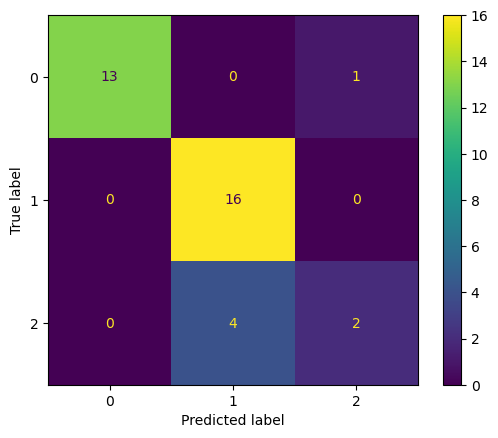

In [52]:
disp = ConfusionMatrixDisplay.from_estimator(model, test_data, test_labels)